In [15]:
# This section of the code is for all of my imports
# The file we are processing (hardcoded, in the future make a for loop that processes it all)
# And ringlet approx (Hardcoded)
# Output is the keys we can access for later on

In [16]:
# Put the occultation file here

# Imports
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd

# This allows me to access my flash drive that im working off of
os.chdir('/Volumes/Flash Drive')

# ===== CHANGE THIS TO ANALYZE DIFFERENT OCCULTATIONS =====
occultation_file = 'PUT IN FILE HERE'  # Change this filename to analyze different occultations
# ==========================================================

# Initial approximate locations of the ringlets (Hardcoded)
saturn_ringlets_approx = {
    'Titan': 77883,      # Colombo Gap - looks accurate in the plot around 77500-78000
    'Maxwell': 87500,    # Maxwell Gap - appears correct around 87000-87500
    'Bond': 88710,       # Bond Ringlet - looks close, around 88500-89000
    'Huygens': 117800,   # Huygens Gap - in the inset, appears around 117500
    'Dawes': 90210       # Dawes Ringlet - appears around 90000-90500
}

# Reading in the specified file
file_path = f'/Volumes/Flash Drive/Saturns rings Research/Data/BetCen Occultations/{occultation_file}'
test = sio.readsav(file_path)

# Reading normal keys only return psldata, this allows us to access the 'REAL' keys
for key in test.keys():
    data = test[key]
    if hasattr(data, 'shape'):
        print(f"{key}: shape = {data.shape}, dtype = {data.dtype}")
    else:
        print(f"{key}: type = {type(data)}")

# Extract the data structure
pdsdata = test['pdsdata'][0]

# Get radius and tau to graph radius vs optical depth
radius = pdsdata['RADIUS']
tau = pdsdata['TAU']

pdsdata: shape = (1,), dtype = (numpy.record, [(('radius', 'RADIUS'), 'O'), (('dat', 'DAT'), 'O'), (('et', 'ET'), 'O'), (('lon', 'LON'), 'O'), (('nbins', 'NBINS'), 'O'), (('phi', 'PHI'), 'O'), (('b_angle', 'B_ANGLE'), '>f8'), (('mu', 'MU'), '>f8'), (('i0', 'I0'), 'O'), (('background', 'BACKGROUND'), 'O'), (('tau', 'TAU'), 'O'), (('taumax', 'TAUMAX'), 'O'), (('tauplus', 'TAUPLUS'), 'O'), (('tauminus', 'TAUMINUS'), 'O'), (('dlos', 'DLOS'), 'O'), (('int_area1', 'INT_AREA1'), 'O'), (('int_area2', 'INT_AREA2'), 'O'), (('vaz', 'VAZ'), 'O'), (('vrad', 'VRAD'), 'O'), (('imaxrr', 'IMAXRR'), 'O'), (('imaxpts', 'IMAXPTS'), 'O'), (('backrr', 'BACKRR'), 'O'), (('backpts', 'BACKPTS'), 'O'), (('moments200', 'MOMENTS200'), 'O'), (('moments1000', 'MOMENTS1000'), 'O'), (('rad200', 'RAD200'), 'O'), (('rad1000', 'RAD1000'), 'O'), (('flag', 'FLAG'), 'O'), (('source_product', 'SOURCE_PRODUCT'), 'O'), (('cims_product', 'CIMS_PRODUCT'), 'O')])


In [17]:
# This section of code plots the graphs of tau vs radius as well as the approx locations of the ringlets to find the ringlets,
# The range of this graph is ~70,000 km to 120,000 km (left out from 120,001 km to 150,000 km due to no ringlets)

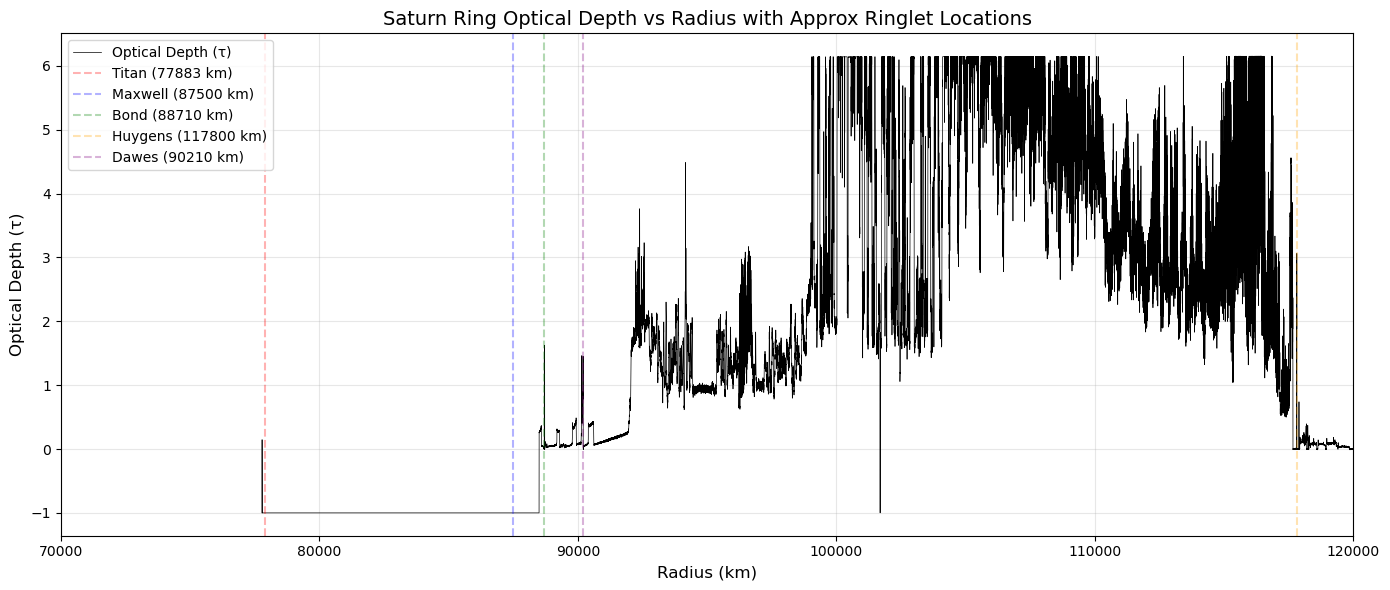

In [18]:
# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(radius, tau, 'k-', linewidth=0.5, label='Optical Depth (τ)')

# Add vertical lines for each ringlet
colors = ['red', 'blue', 'green', 'orange', 'purple']
for (ringlet_name, ringlet_radius), color in zip(saturn_ringlets_approx.items(), colors):
    plt.axvline(x=ringlet_radius, color=color, linestyle='--', linewidth=1.5, 
                label=f'{ringlet_name} ({ringlet_radius} km)', alpha=0.3)

# Labels and title
plt.xlabel('Radius (km)', fontsize=12)
plt.ylabel('Optical Depth (τ)', fontsize=12)
plt.title('Saturn Ring Optical Depth vs Radius with Approx Ringlet Locations', fontsize=14)
plt.xlim(70000,120000)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# This zooms into the Approx area of the ringlets +-100 km to center of the approx locations
# We deal with essentric factors so the location of the ringlets will not be the same each time, so long as they are in frame we are good

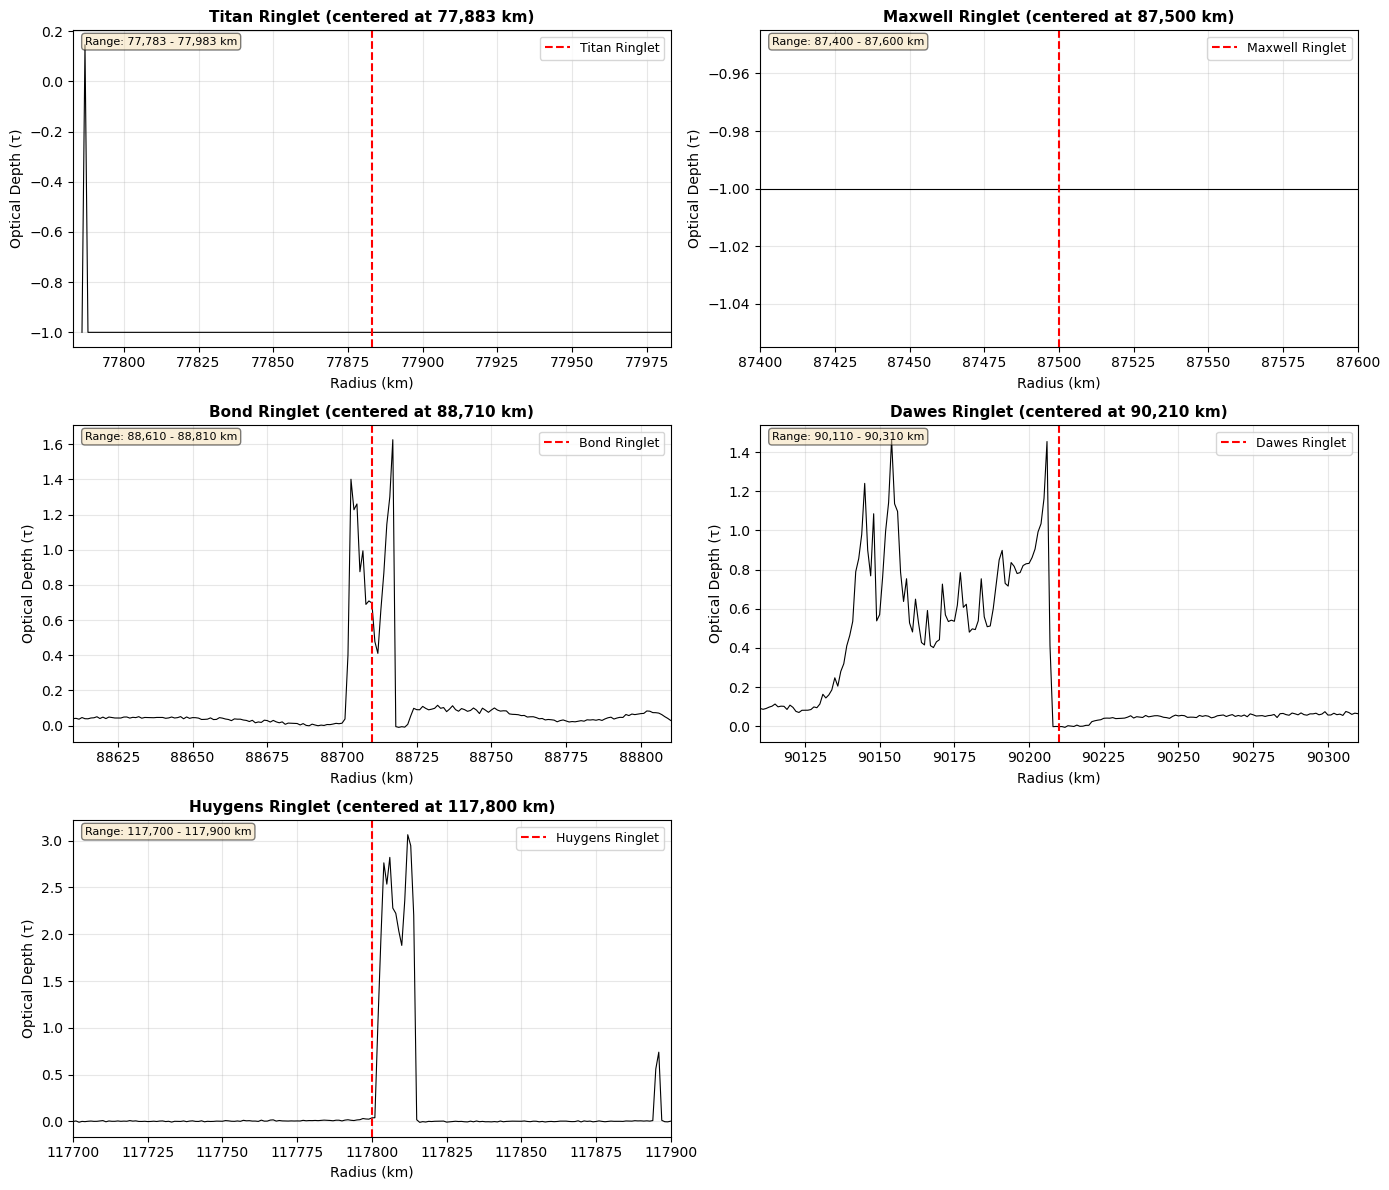


Ringlet Zoom Regions:
Titan          : 77,883 km  (zoom: 77,783 to 77,983 km)
Maxwell        : 87,500 km  (zoom: 87,400 to 87,600 km)
Bond           : 88,710 km  (zoom: 88,610 to 88,810 km)
Dawes          : 90,210 km  (zoom: 90,110 to 90,310 km)
Huygens        : 117,800 km  (zoom: 117,700 to 117,900 km)


In [20]:
# Extract the data structure
pdsdata = test['pdsdata'][0]

# Get radius and tau
radius = pdsdata['RADIUS']
tau = pdsdata['TAU']

# Create 5 separate plots, each zoomed in ±100 km from ringlet center
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each ringlet
for idx, (ringlet_name, ringlet_radius) in enumerate(sorted(saturn_ringlets_approx.items(), key=lambda x: x[1])):
    ax = axes[idx]
    
    # Define the zoom window: ±100 km from ringlet center
    r_min = ringlet_radius - 100
    r_max = ringlet_radius + 100
    
    # Create mask for this zoom region
    mask = (radius >= r_min) & (radius <= r_max)
    
    # Plot tau vs radius
    ax.plot(radius[mask], tau[mask], 'k-', linewidth=0.8)
    
    # Add vertical line at ringlet center
    ax.axvline(x=ringlet_radius, color='red', linestyle='--', linewidth=1.5, 
               label=f'{ringlet_name} Ringlet')
    
    # Labels and title
    ax.set_xlabel('Radius (km)', fontsize=10)
    ax.set_ylabel('Optical Depth (τ)', fontsize=10)
    ax.set_title(f'{ringlet_name} Ringlet (centered at {ringlet_radius:,} km)', fontsize=11, fontweight='bold')
    ax.set_xlim(r_min, r_max)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=9)
    
    # Add text showing the zoom range
    ax.text(0.02, 0.98, f'Range: {r_min:,} - {r_max:,} km', 
            transform=ax.transAxes, fontsize=8, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove the 6th empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

# Print summary
print("\nRinglet Zoom Regions:")
print("=" * 60)
for ringlet, distance in sorted(saturn_ringlets_approx.items(), key=lambda x: x[1]):
    print(f"{ringlet:15s}: {distance:,} km  (zoom: {distance-100:,} to {distance+100:,} km)")

In [21]:
# Using Max tau to find the ringlets (First approach, not used but want to keep for documentation purposes.)

Analyzing occultation: BetCen_105I_1km.sav
Data radius range: 77786.00 km to 158711.00 km
Number of data points: 80926

Finding ringlet centers based on maximum optical depth:

Titan: Searching 77783.00 - 77983.00 km, found 198 points
  Approx: 77,883 km -> Refined: 77787.00 km (max τ = 0.1462)

Maxwell: Searching 87400.00 - 87600.00 km, found 201 points
  Approx: 87,500 km -> Refined: 87400.00 km (max τ = -1.0000)

Bond: Searching 88610.00 - 88810.00 km, found 201 points
  Approx: 88,710 km -> Refined: 88717.00 km (max τ = 1.6257)

Dawes: Searching 90110.00 - 90310.00 km, found 201 points
  Approx: 90,210 km -> Refined: 90154.00 km (max τ = 1.4627)

Huygens: Searching 117700.00 - 117900.00 km, found 201 points
  Approx: 117,800 km -> Refined: 117812.00 km (max τ = 3.0640)




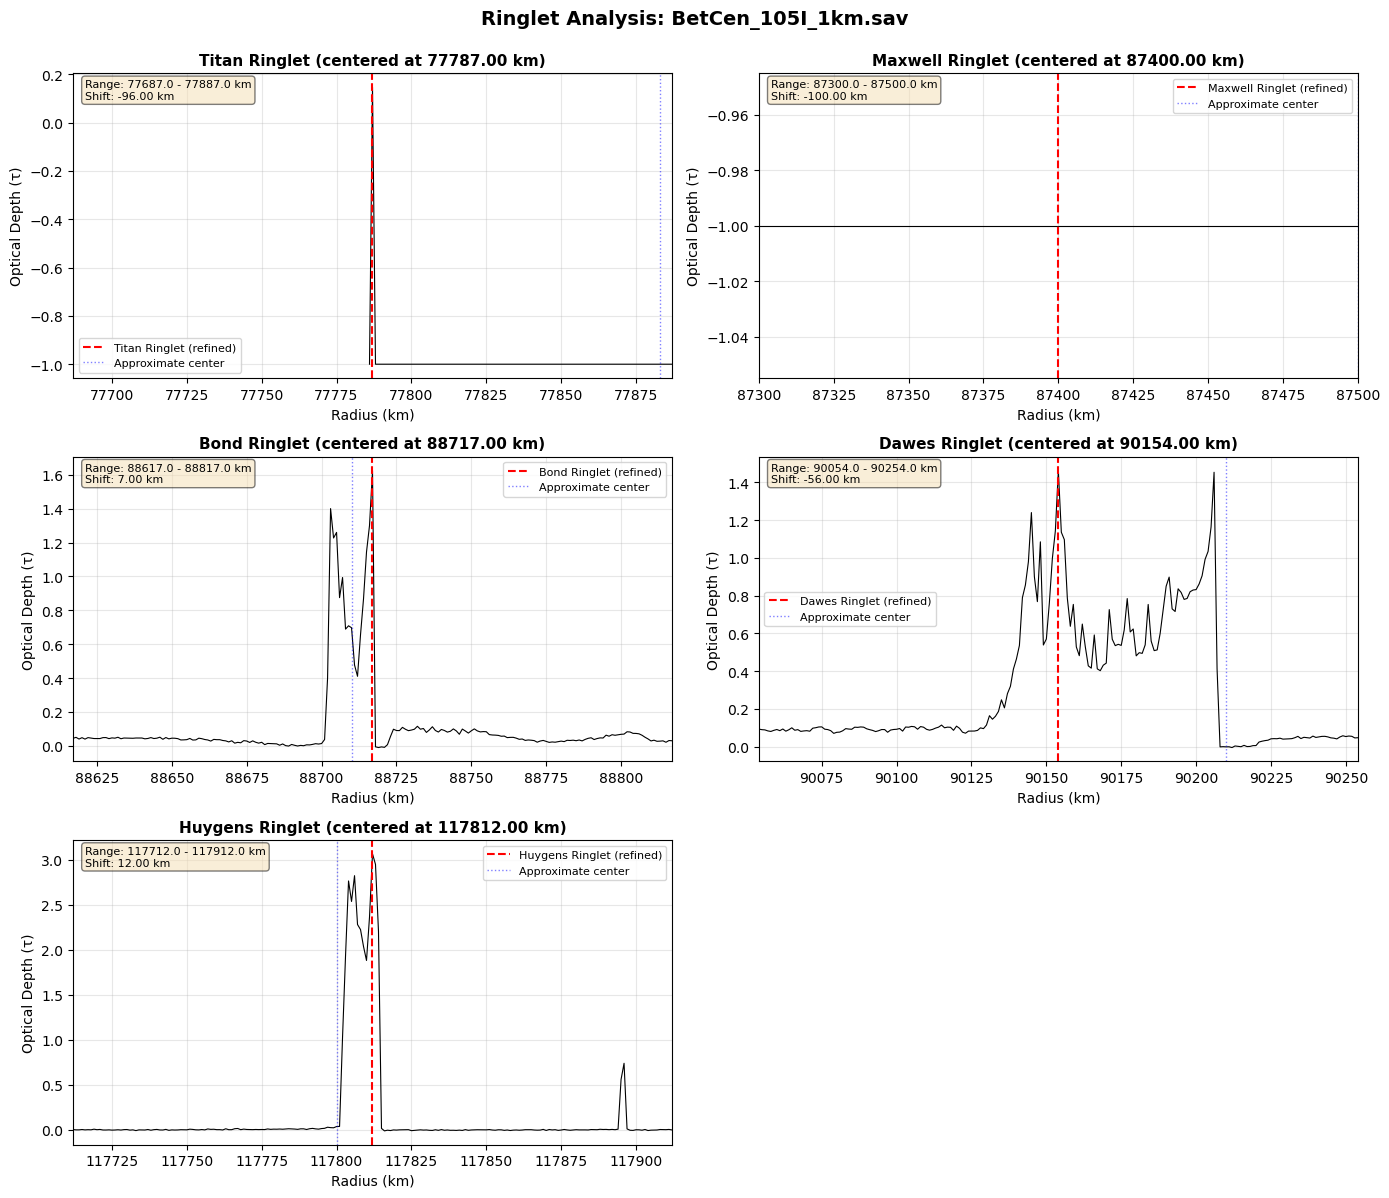


Ringlet Analysis Summary for BetCen_105I_1km.sav:
Titan          : 77787.00 km (shift: -96.00 km) - Refined (max τ = 0.1462)
Maxwell        : 87400.00 km (shift: -100.00 km) - Refined (max τ = -1.0000)
Bond           : 88717.00 km (shift: +7.00 km) - Refined (max τ = 1.6257)
Dawes          : 90154.00 km (shift: -56.00 km) - Refined (max τ = 1.4627)
Huygens        : 117812.00 km (shift: +12.00 km) - Refined (max τ = 3.0640)


In [27]:
print(f"Analyzing occultation: {occultation_file}")
print("=" * 70)
print(f"Data radius range: {np.min(radius):.2f} km to {np.max(radius):.2f} km")
print(f"Number of data points: {len(radius)}\n")

# Dictionary to store refined ringlet positions based on max tau
saturn_ringlets_refined = {}
ringlet_status = {}  # Track which ringlets have data

# Initialize dictionaries with placeholder values for plotting
saturn_ringlets_refined = saturn_ringlets_approx.copy()
ringlet_status = {name: 'Approximate center (no analysis)' for name in saturn_ringlets_approx.keys()}
ringlet_edges = {name: (None, None, None) for name in saturn_ringlets_approx.keys()}

# Find the actual center of each ringlet based on max optical depth
print("Finding ringlet centers based on maximum optical depth:")
print("=" * 70)
for ringlet_name, ringlet_radius_approx in sorted(saturn_ringlets_approx.items(), key=lambda x: x[1]):
    # Define initial search window: ±100 km from approximate center
    r_min_search = ringlet_radius_approx - 100
    r_max_search = ringlet_radius_approx + 100
    
    # Create mask for search region
    mask_search = (radius >= r_min_search) & (radius <= r_max_search)
    
    # Checking if there even is data there (some Occ dont have data in that area)
    n_points = np.sum(mask_search)
    print(f"\n{ringlet_name}: Searching {r_min_search:.2f} - {r_max_search:.2f} km, found {n_points} points")
    
    if n_points == 0:
        print(f"  WARNING: No data found in search region! Skipping analysis.")
        saturn_ringlets_refined[ringlet_name] = ringlet_radius_approx
        ringlet_status[ringlet_name] = 'N/A - No Data'
        continue

    # Find the radius where tau is maximum in this region
    tau_in_region = tau[mask_search]
    radius_in_region = radius[mask_search]
    
    max_tau_idx = np.argmax(tau_in_region)
    refined_center = radius_in_region[max_tau_idx]
    max_tau_value = tau_in_region[max_tau_idx]
    
    saturn_ringlets_refined[ringlet_name] = refined_center
    ringlet_status[ringlet_name] = f'Refined (max τ = {max_tau_value:.4f})'
    
    print(f"  Approx: {ringlet_radius_approx:,} km -> "
          f"Refined: {refined_center:.2f} km (max τ = {max_tau_value:.4f})")



print("\n" + "=" * 70 + "\n")

# Create 5 separate plots, each zoomed in ±100 km from ringlet center
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each ringlet
for idx, (ringlet_name, ringlet_radius) in enumerate(sorted(saturn_ringlets_refined.items(), key=lambda x: x[1])):
    ax = axes[idx]
    
    # Define the zoom window: ±100 km from ringlet center
    r_min = ringlet_radius - 100
    r_max = ringlet_radius + 100
    
    # Create mask for this zoom region
    mask = (radius >= r_min) & (radius <= r_max)
    
    # Check if we have data to plot
    if np.sum(mask) == 0:
        ax.text(0.5, 0.5, f'N/A - No Data Available\n\n{ringlet_name} Ringlet\nExpected at {ringlet_radius:,.0f} km', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        ax.set_title(f'{ringlet_name} Ringlet - N/A', fontsize=11, fontweight='bold', color='gray')
        ax.set_xlabel('Radius (km)', fontsize=10)
        ax.set_ylabel('Optical Depth (τ)', fontsize=10)
        ax.grid(True, alpha=0.3)
        continue
    
    # Plot tau vs radius
    ax.plot(radius[mask], tau[mask], 'k-', linewidth=0.8)
    
    # Add vertical line at ringlet center
    if ringlet_status[ringlet_name] != 'N/A - No Data':
        ax.axvline(x=ringlet_radius, color='red', linestyle='--', linewidth=1.5, 
                   label=f'{ringlet_name} Ringlet (refined)')
        
        # Also show the approximate center for comparison
        approx_center = saturn_ringlets_approx[ringlet_name]
        if r_min <= approx_center <= r_max and approx_center != ringlet_radius:
            ax.axvline(x=approx_center, color='blue', linestyle=':', linewidth=1, alpha=0.5,
                       label=f'Approximate center')
    else:
        # For N/A status, just show approximate
        ax.axvline(x=ringlet_radius, color='blue', linestyle=':', linewidth=1.5, 
                   label=f'{ringlet_name} Ringlet (approx)')
    
    # Labels and title
    ax.set_xlabel('Radius (km)', fontsize=10)
    ax.set_ylabel('Optical Depth (τ)', fontsize=10)
    
    if ringlet_status[ringlet_name] != 'N/A - No Data':
        ax.set_title(f'{ringlet_name} Ringlet (centered at {ringlet_radius:.2f} km)', 
                     fontsize=11, fontweight='bold')
    else:
        ax.set_title(f'{ringlet_name} Ringlet (approx at {ringlet_radius:.0f} km) - Limited Data', 
                     fontsize=11, fontweight='bold', color='orange')
    
    ax.set_xlim(r_min, r_max)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=8)
    
    # Add text showing the zoom range and shift/status
    if ringlet_status[ringlet_name] != 'N/A - No Data':
        approx_center = saturn_ringlets_approx[ringlet_name]
        shift = ringlet_radius - approx_center
        ax.text(0.02, 0.98, f'Range: {r_min:.1f} - {r_max:.1f} km\nShift: {shift:.2f} km', 
                transform=ax.transAxes, fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        ax.text(0.02, 0.98, f'Range: {r_min:.1f} - {r_max:.1f} km\nStatus: N/A', 
                transform=ax.transAxes, fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

# Remove the 6th empty subplot
fig.delaxes(axes[5])

# Add overall title with the filename
fig.suptitle(f'Ringlet Analysis: {occultation_file}', fontsize=14, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

# Print summary
print(f"\nRinglet Analysis Summary for {occultation_file}:")
print("=" * 70)
for ringlet in sorted(saturn_ringlets_refined.keys(), key=lambda x: saturn_ringlets_refined[x]):
    distance = saturn_ringlets_refined[ringlet]
    status = ringlet_status[ringlet]
    approx = saturn_ringlets_approx[ringlet]
    
    if status == 'N/A - No Data':
        print(f"{ringlet:15s}: {distance:.0f} km (approx) - {status}")
    else:
        shift = distance - approx
        print(f"{ringlet:15s}: {distance:.2f} km (shift: {shift:+.2f} km) - {status}")

Finding ringlet centers based on tau threshold crossings:

Titan: Searching 77783.00 - 77983.00 km, found 198 points
  Max tau: 0.1462, Using adaptive threshold: 0.0439
  Approx: 77,883 km
  Left edge (τ≥0.0439): 77787.00 km
  Right edge (τ≥0.0439): 77787.00 km
  Refined center (median): 77787.00 km
  Width: 0.00 km

Maxwell: Searching 87400.00 - 87600.00 km, found 201 points
  Max tau: -1.0000, Using adaptive threshold: -0.3000
  Refined: 87400.00 km (max τ = -1.0000)

Bond: Searching 88610.00 - 88810.00 km, found 201 points
  Max tau: 1.6257, Using adaptive threshold: 0.4877
  Approx: 88,710 km
  Left edge (τ≥0.4877): 88703.00 km
  Right edge (τ≥0.4877): 88717.00 km
  Refined center (median): 88710.00 km
  Width: 14.00 km

Dawes: Searching 90110.00 - 90310.00 km, found 201 points
  Max tau: 1.4627, Using adaptive threshold: 0.4388
  Approx: 90,210 km
  Left edge (τ≥0.4388): 90140.00 km
  Right edge (τ≥0.4388): 90206.00 km
  Refined center (median): 90173.00 km
  Width: 66.00 km

Huyg

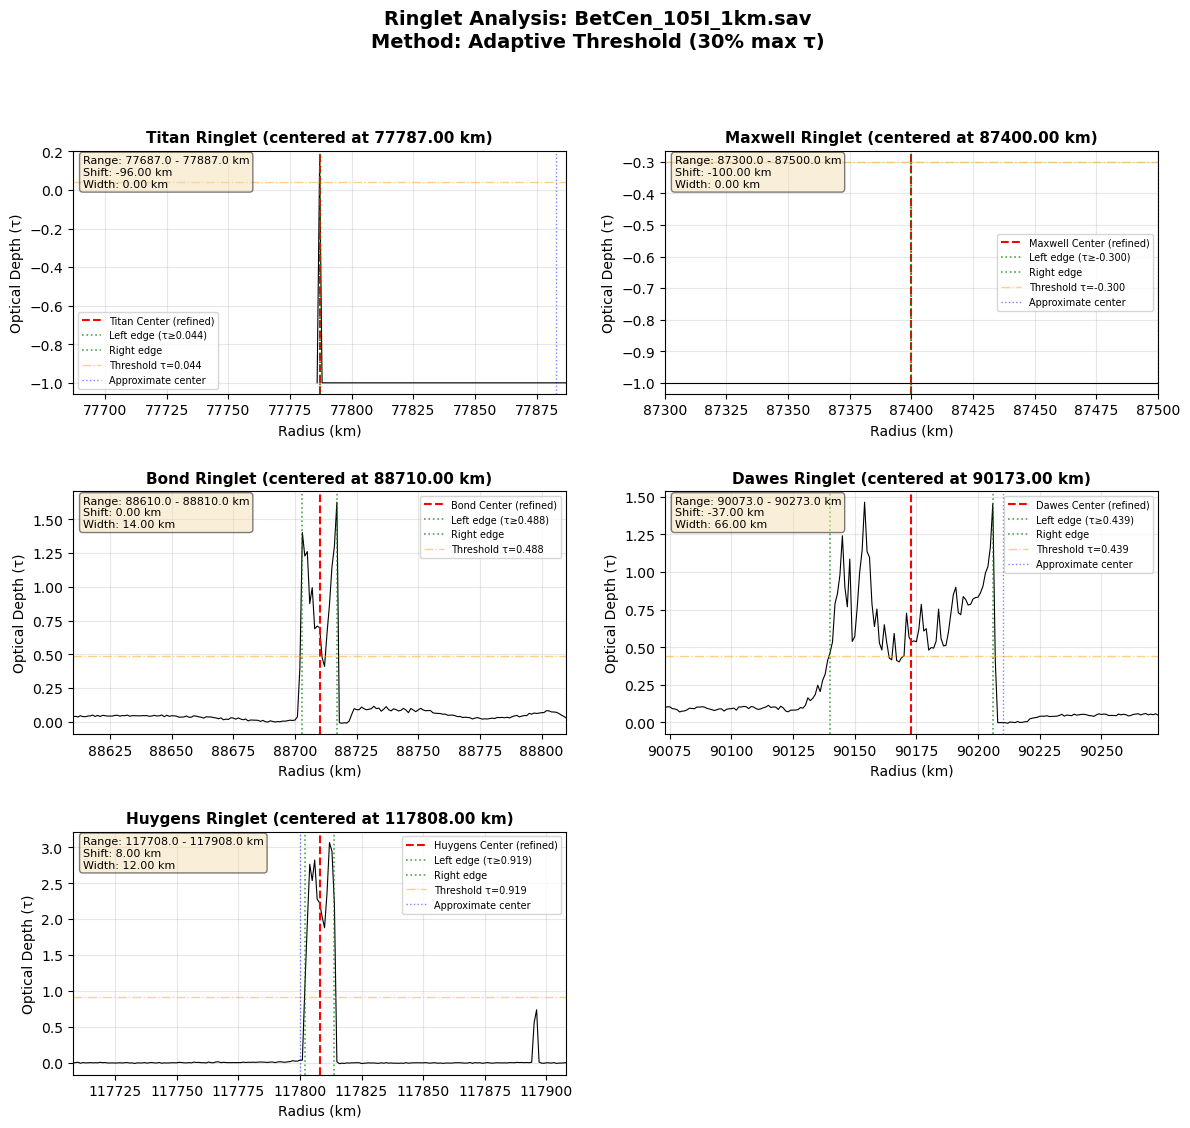


Ringlet Analysis Summary for BetCen_105I_1km.sav:
Titan          : 77787.00 km (shift: -96.00 km, width: 0.00 km) - Adaptive (30% max τ), max τ = 0.1462
Maxwell        : 87400.00 km (shift: -100.00 km, width: 0.00 km) - Max tau fallback (max τ = -1.0000)
Bond           : 88710.00 km (shift: +0.00 km, width: 14.00 km) - Adaptive (30% max τ), max τ = 1.6257
Dawes          : 90173.00 km (shift: -37.00 km, width: 66.00 km) - Adaptive (30% max τ), max τ = 1.4627
Huygens        : 117808.00 km (shift: +8.00 km, width: 12.00 km) - Adaptive (30% max τ), max τ = 3.0640


In [29]:
# Finding the Center of the rings based on thresholds rather then max Tau
print("Finding ringlet centers based on tau threshold crossings:")
print("=" * 70)

# Initialize dictionaries with placeholder values for plotting
saturn_ringlets_refined = saturn_ringlets_approx.copy()
ringlet_status = {name: 'Approximate center (no analysis)' for name in saturn_ringlets_approx.keys()}
ringlet_edges = {name: (None, None, None) for name in saturn_ringlets_approx.keys()}

for ringlet_name, ringlet_radius_approx in sorted(saturn_ringlets_approx.items(), key=lambda x: x[1]):
    # Define initial search window: ±100 km from approximate center
    r_min_search = ringlet_radius_approx - 100
    r_max_search = ringlet_radius_approx + 100
    
    # Create mask for search region
    mask_search = (radius >= r_min_search) & (radius <= r_max_search)
    
    # Checking if there even is data there
    n_points = np.sum(mask_search)
    print(f"\n{ringlet_name}: Searching {r_min_search:.2f} - {r_max_search:.2f} km, found {n_points} points")
    
    if n_points == 0:
        print(f"  WARNING: No data found in search region! Skipping analysis.")
        saturn_ringlets_refined[ringlet_name] = ringlet_radius_approx
        ringlet_status[ringlet_name] = 'N/A - No Data'
        ringlet_edges[ringlet_name] = (None, None, None)
        continue

    # Get data in this region
    tau_in_region = tau[mask_search]
    radius_in_region = radius[mask_search]
    
    # Determine adaptive threshold (20% of max tau) ------------------------------------------------------ Edit Threshold value here
    max_tau_value = np.max(tau_in_region)
    threshold = 0.2 * max_tau_value 
    print(f"  Max tau: {max_tau_value:.4f}, Using adaptive threshold: {threshold:.4f}")
    
    # Find points where tau crosses the threshold
    above_threshold = tau_in_region >= threshold
    
    if not np.any(above_threshold):
        print(f"  WARNING: No points above tau = {threshold:.4f}! Using max tau approach instead.")
        max_tau_idx = np.argmax(tau_in_region)
        refined_center = radius_in_region[max_tau_idx]
        saturn_ringlets_refined[ringlet_name] = refined_center
        ringlet_status[ringlet_name] = f'Max tau fallback (max τ = {max_tau_value:.4f})'
        ringlet_edges[ringlet_name] = (refined_center, refined_center, threshold)
        print(f"  Refined: {refined_center:.2f} km (max τ = {max_tau_value:.4f})")
        continue
    
    # Find the indices where we cross the threshold
    crossing_indices = np.where(above_threshold)[0]
    left_idx = crossing_indices[0]
    right_idx = crossing_indices[-1]
    
    left_radius = radius_in_region[left_idx]
    right_radius = radius_in_region[right_idx]
    
    # Calculate median (center) between left and right edges
    refined_center = np.median([left_radius, right_radius])
    
    saturn_ringlets_refined[ringlet_name] = refined_center
    ringlet_edges[ringlet_name] = (left_radius, right_radius, threshold)
    ringlet_status[ringlet_name] = f'Adaptive (20% max τ), max τ = {max_tau_value:.4f}'
    
    print(f"  Approx: {ringlet_radius_approx:,} km")
    print(f"  Left edge (τ≥{threshold:.4f}): {left_radius:.2f} km")
    print(f"  Right edge (τ≥{threshold:.4f}): {right_radius:.2f} km")
    print(f"  Refined center (median): {refined_center:.2f} km")
    print(f"  Width: {right_radius - left_radius:.2f} km")

print("\n" + "=" * 70 + "\n")

# Create 5 separate plots, each zoomed in ±100 km from ringlet center
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each ringlet
for idx, (ringlet_name, ringlet_radius) in enumerate(sorted(saturn_ringlets_refined.items(), key=lambda x: x[1])):
    ax = axes[idx]
    
    # Define the zoom window: ±100 km from ringlet center
    r_min = ringlet_radius - 100
    r_max = ringlet_radius + 100
    
    # Create mask for this zoom region
    mask = (radius >= r_min) & (radius <= r_max)
    
    # Check if we have data to plot
    if np.sum(mask) == 0:
        ax.text(0.5, 0.5, f'N/A - No Data Available\n\n{ringlet_name} Ringlet\nExpected at {ringlet_radius:,.0f} km', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        ax.set_title(f'{ringlet_name} Ringlet - N/A', fontsize=11, fontweight='bold', color='gray')
        ax.set_xlabel('Radius (km)', fontsize=10)
        ax.set_ylabel('Optical Depth (τ)', fontsize=10)
        ax.grid(True, alpha=0.3)
        continue
    
    # Plot tau vs radius
    ax.plot(radius[mask], tau[mask], 'k-', linewidth=0.8)
    
    # Add vertical line at ringlet center
    if ringlet_status[ringlet_name] != 'N/A - No Data':
        ax.axvline(x=ringlet_radius, color='red', linestyle='--', linewidth=1.5, 
                   label=f'{ringlet_name} Center (refined)')
        
        # Get edge information
        left_edge, right_edge, threshold_used = ringlet_edges[ringlet_name]
        
        # Plot the edges and threshold line if available
        if left_edge is not None and right_edge is not None:
            # Plot vertical lines at edges
            ax.axvline(x=left_edge, color='green', linestyle=':', linewidth=1.2, 
                       alpha=0.7, label=f'Left edge (τ≥{threshold_used:.3f})')
            ax.axvline(x=right_edge, color='green', linestyle=':', linewidth=1.2, 
                       alpha=0.7, label=f'Right edge')
            
            # Plot horizontal threshold line
            ax.axhline(y=threshold_used, color='orange', linestyle='-.', linewidth=1, 
                       alpha=0.5, label=f'Threshold τ={threshold_used:.3f}')
        
        # Also show the approximate center for comparison
        approx_center = saturn_ringlets_approx[ringlet_name]
        if r_min <= approx_center <= r_max and abs(approx_center - ringlet_radius) > 1:
            ax.axvline(x=approx_center, color='blue', linestyle=':', linewidth=1, alpha=0.5,
                       label=f'Approximate center')
    else:
        # For N/A status, just show approximate
        ax.axvline(x=ringlet_radius, color='blue', linestyle=':', linewidth=1.5, 
                   label=f'{ringlet_name} Ringlet (approx)')
    
    # Labels and title
    ax.set_xlabel('Radius (km)', fontsize=10)
    ax.set_ylabel('Optical Depth (τ)', fontsize=10)
    
    if ringlet_status[ringlet_name] != 'N/A - No Data':
        ax.set_title(f'{ringlet_name} Ringlet (centered at {ringlet_radius:.2f} km)', 
                     fontsize=11, fontweight='bold')
    else:
        ax.set_title(f'{ringlet_name} Ringlet (approx at {ringlet_radius:.0f} km) - Limited Data', 
                     fontsize=11, fontweight='bold', color='orange')
    
    ax.set_xlim(r_min, r_max)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=7)
    
    # Add text showing the zoom range and shift/status
    if ringlet_status[ringlet_name] != 'N/A - No Data':
        approx_center = saturn_ringlets_approx[ringlet_name]
        shift = ringlet_radius - approx_center
        left_edge, right_edge, _ = ringlet_edges[ringlet_name]
        
        if left_edge is not None and right_edge is not None:
            width = right_edge - left_edge
            info_text = f'Range: {r_min:.1f} - {r_max:.1f} km\nShift: {shift:.2f} km\nWidth: {width:.2f} km'
        else:
            info_text = f'Range: {r_min:.1f} - {r_max:.1f} km\nShift: {shift:.2f} km'
            
        ax.text(0.02, 0.98, info_text, 
                transform=ax.transAxes, fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        ax.text(0.02, 0.98, f'Range: {r_min:.1f} - {r_max:.1f} km\nStatus: N/A', 
                transform=ax.transAxes, fontsize=8, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

# Remove the 6th empty subplot
fig.delaxes(axes[5])

# Add overall title with the filename and method
fig.suptitle(f'Ringlet Analysis: {occultation_file}\nMethod: Adaptive Threshold (20% max τ)', 
             fontsize=14, fontweight='bold', y=0.998)

# Save the figure as PNG with the occultation name
output_filename = f'/Volumes/Flash Drive/Saturns rings Research/Screenshot Outputs/{occultation_file.replace(".sav", "")}_ringlet_analysis.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"\nFigure saved as: {output_filename}")


plt.subplots_adjust(hspace=0.4)  # Increase vertical space between rows
plt.show()

# Print summary
print(f"\nRinglet Analysis Summary for {occultation_file}:")
print("=" * 70)
for ringlet in sorted(saturn_ringlets_refined.keys(), key=lambda x: saturn_ringlets_refined[x]):
    distance = saturn_ringlets_refined[ringlet]
    status = ringlet_status[ringlet]
    approx = saturn_ringlets_approx[ringlet]
    
    if status == 'N/A - No Data':
        print(f"{ringlet:15s}: {distance:.0f} km (approx) - {status}")
    else:
        shift = distance - approx
        left_edge, right_edge, _ = ringlet_edges[ringlet]
        if left_edge is not None and right_edge is not None:
            width = right_edge - left_edge
            print(f"{ringlet:15s}: {distance:.2f} km (shift: {shift:+.2f} km, width: {width:.2f} km) - {status}")
        else:
            print(f"{ringlet:15s}: {distance:.2f} km (shift: {shift:+.2f} km) - {status}")

In [ ]:
# This part of the code takes the edges of the ringlets and extends 5 km beyond each edge
# Then extracts all individual data points (not medians) within that range for each ringlet

In [ ]:
# Extract all individual data points from edge-5km to edge+5km for each ringlet
print("\nExtracting individual data points from ringlet edges ± 5 km:")
print("=" * 70)

# List to store all data points across all ringlets
all_data_points = []

# Get the scalar values once (they're the same for all ringlets)
b_angle_value = float(pdsdata['B_ANGLE'])
mu_value = float(pdsdata['MU'])

for ringlet_name, ringlet_center in saturn_ringlets_refined.items():
    print(f"\n{ringlet_name} Ringlet (center at {ringlet_center:.2f} km):")
    
    # Get the edges from the previous analysis
    left_edge, right_edge, threshold = ringlet_edges[ringlet_name]
    
    if left_edge is None or right_edge is None:
        print(f"  WARNING: No edge data available! Skipping.")
        continue
    
    # Extend 5 km beyond each edge
    r_min = left_edge - 5
    r_max = right_edge + 5
    
    ringlet_width = right_edge - left_edge
    extended_width = r_max - r_min
    
    print(f"  Ringlet edges: {left_edge:.2f} km to {right_edge:.2f} km (width: {ringlet_width:.2f} km)")
    print(f"  Extended range: {r_min:.2f} km to {r_max:.2f} km (total: {extended_width:.2f} km)")
    
    # Create mask for this window
    mask = (radius >= r_min) & (radius <= r_max)
    n_points = np.sum(mask)
    
    print(f"  Number of individual data points: {n_points}")
    print(f"  Expected ~{extended_width:.0f} points (at 1km resolution)")
    
    if n_points == 0:
        print(f"  WARNING: No data in this window!")
        continue
    
    # Extract all individual data points (no averaging!)
    radius_values = radius[mask]
    et_values = pdsdata['ET'][mask]
    moments = pdsdata['MOMENTS200'][mask]  # Shape will be (n_points, 4)
    int_area2_values = pdsdata['INT_AREA2'][mask]
    i0_values = pdsdata['I0'][mask]
    phi_values = pdsdata['PHI'][mask]
    tauplus_values = pdsdata['TAUPLUS'][mask]
    tauminus_values = pdsdata['TAUMINUS'][mask]
    lon_values = pdsdata['LON'][mask]
    tau_values = tau[mask]
    
    # Create a record for each individual data point
    for i in range(n_points):
        data_point = {
            'Ringlet': ringlet_name,
            'Ringlet_Center': ringlet_center,
            'Left_Edge': left_edge,
            'Right_Edge': right_edge,
            'Radius': radius_values[i],
            'Tau': tau_values[i],
            'ET': et_values[i],
            'MOMENTS200_0': moments[i, 0],
            'MOMENTS200_1': moments[i, 1],
            'MOMENTS200_2': moments[i, 2],
            'MOMENTS200_3': moments[i, 3],
            'INT_AREA2': int_area2_values[i],
            'I0': i0_values[i],
            'PHI': phi_values[i],
            'B_ANGLE': b_angle_value,
            'TAUPLUS': tauplus_values[i],
            'TAUMINUS': tauminus_values[i],
            'LON': lon_values[i]
        }
        all_data_points.append(data_point)

print("\n" + "=" * 70)

# Convert to DataFrame - now each row is an individual measurement point
df = pd.DataFrame(all_data_points)

# Save to CSV
output_csv = f'/Volumes/Flash Drive/Saturns rings Research/Data From Center of Ringlets CSV files/{occultation_file.replace(".sav", "")}_ringlet_individual_points.csv'
df.to_csv(output_csv, index=False)
print(f"\nData saved to: {output_csv}")
print(f"Total data points saved: {len(df)}")
print(f"\nPreview of saved data (first 10 rows):")
print(df.head(10))
print(f"\nData points per ringlet:")
print(df.groupby('Ringlet').size())

In [26]:
# Run this code only if the first process does not work above (get rid of the """ at start and end""")

"""
# Extract data within ±3 km of each ringlet center
print("\nExtracting data within ±3 km of ringlet centers:")
print("=" * 70)

ringlet_data = {}

# Get the scalar values once (they're the same for all ringlets)
b_angle_value = float(pdsdata['B_ANGLE'])
mu_value = float(pdsdata['MU'])

# Check array lengths for consistency
radius_len = len(radius)
print(f"\nChecking array lengths:")
print(f"  RADIUS length: {radius_len}")
for field in ['ET', 'MOMENTS200', 'INT_AREA2', 'I0', 'PHI', 'TAUPLUS', 'TAUMINUS', 'LON']:
    field_len = len(pdsdata[field])
    print(f"  {field} length: {field_len}")

for ringlet_name, ringlet_center in saturn_ringlets_refined.items():
    print(f"\n{ringlet_name} Ringlet (center at {ringlet_center:.2f} km):")
    
    # Define the window: ±3 km from center
    r_min = ringlet_center - 3
    r_max = ringlet_center + 3
    
    # Create mask for this window
    mask = (radius >= r_min) & (radius <= r_max)
    n_points = np.sum(mask)
    
    print(f"  Window: {r_min:.2f} - {r_max:.2f} km")
    print(f"  Number of points: {n_points}")
    
    if n_points == 0:
        print(f"  WARNING: No data in this window!")
        ringlet_data[ringlet_name] = {
            'ET': np.nan,
            'MOMENTS200_0': np.nan,
            'MOMENTS200_1': np.nan,
            'MOMENTS200_2': np.nan,
            'MOMENTS200_3': np.nan,
            'INT_AREA2': np.nan,
            'I0': np.nan,
            'PHI': np.nan,
            'B_ANGLE': b_angle_value,
            'TAUPLUS': np.nan,
            'TAUMINUS': np.nan,
            'LON': np.nan
        }
        continue
    
    try:
        # Helper function to safely extract array with mask
        def safe_extract(field_name):
            field_data = pdsdata[field_name]
            field_len = len(field_data)
            
            if field_len == radius_len:
                # Perfect match - use mask directly
                return field_data[mask]
            elif field_len > radius_len:
                # Field is longer - truncate then apply mask
                return field_data[:radius_len][mask]
            else:
                # Field is shorter - truncate mask to match field length
                truncated_mask = mask[:field_len]
                return field_data[truncated_mask]
        
        # Extract the data using safe extraction
        et_values = safe_extract('ET')
        int_area2_values = safe_extract('INT_AREA2')
        i0_values = safe_extract('I0')
        phi_values = safe_extract('PHI')
        tauplus_values = safe_extract('TAUPLUS')
        tauminus_values = safe_extract('TAUMINUS')
        lon_values = safe_extract('LON')
        
        # Handle MOMENTS200 specially (2D array)
        moments_full = pdsdata['MOMENTS200']
        moments_len = len(moments_full)
        if moments_len == radius_len:
            moments = moments_full[mask]
        elif moments_len > radius_len:
            moments = moments_full[:radius_len][mask]
        else:
            truncated_mask = mask[:moments_len]
            moments = moments_full[truncated_mask]
        
        # Calculate medians
        median_values = {
            'ET': np.median(et_values),
            'MOMENTS200_0': np.median(moments[:, 0]),
            'MOMENTS200_1': np.median(moments[:, 1]),
            'MOMENTS200_2': np.median(moments[:, 2]),
            'MOMENTS200_3': np.median(moments[:, 3]),
            'INT_AREA2': np.median(int_area2_values),
            'I0': np.median(i0_values),
            'PHI': np.median(phi_values),
            'B_ANGLE': b_angle_value,
            'TAUPLUS': np.median(tauplus_values),
            'TAUMINUS': np.median(tauminus_values),
            'LON': np.median(lon_values)
        }
        
        ringlet_data[ringlet_name] = median_values
        
        print(f"  Median ET: {median_values['ET']:.2f}")
        print(f"  Median INT_AREA2: {median_values['INT_AREA2']:.4f}")
        print(f"  Median I0: {median_values['I0']:.4f}")
        
    except Exception as e:
        print(f"  ERROR extracting data: {e}")
        ringlet_data[ringlet_name] = {
            'ET': np.nan,
            'MOMENTS200_0': np.nan,
            'MOMENTS200_1': np.nan,
            'MOMENTS200_2': np.nan,
            'MOMENTS200_3': np.nan,
            'INT_AREA2': np.nan,
            'I0': np.nan,
            'PHI': np.nan,
            'B_ANGLE': b_angle_value,
            'TAUPLUS': np.nan,
            'TAUMINUS': np.nan,
            'LON': np.nan
        }

print("\n" + "=" * 70)

# Convert to DataFrame
df = pd.DataFrame(ringlet_data).T
df.index.name = 'Ringlet'

# Save to CSV
output_csv = f'/Volumes/Flash Drive/Saturns rings Research/Data From Center of Ringlets CSV files/{occultation_file.replace(".sav", "")}_ringlet_medians.csv'
df.to_csv(output_csv)
print(f"\nData saved to: {output_csv}")
print(f"\nPreview of saved data:")
print(df)
"""

'\n# Extract data within ±3 km of each ringlet center\nprint("\nExtracting data within ±3 km of ringlet centers:")\nprint("=" * 70)\n\nringlet_data = {}\n\n# Get the scalar values once (they\'re the same for all ringlets)\nb_angle_value = float(pdsdata[\'B_ANGLE\'])\nmu_value = float(pdsdata[\'MU\'])\n\n# Check array lengths for consistency\nradius_len = len(radius)\nprint(f"\nChecking array lengths:")\nprint(f"  RADIUS length: {radius_len}")\nfor field in [\'ET\', \'MOMENTS200\', \'INT_AREA2\', \'I0\', \'PHI\', \'TAUPLUS\', \'TAUMINUS\', \'LON\']:\n    field_len = len(pdsdata[field])\n    print(f"  {field} length: {field_len}")\n\nfor ringlet_name, ringlet_center in saturn_ringlets_refined.items():\n    print(f"\n{ringlet_name} Ringlet (center at {ringlet_center:.2f} km):")\n    \n    # Define the window: ±3 km from center\n    r_min = ringlet_center - 3\n    r_max = ringlet_center + 3\n    \n    # Create mask for this window\n    mask = (radius >= r_min) & (radius <= r_max)\n    n_po